In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Preview

/Users/dl/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


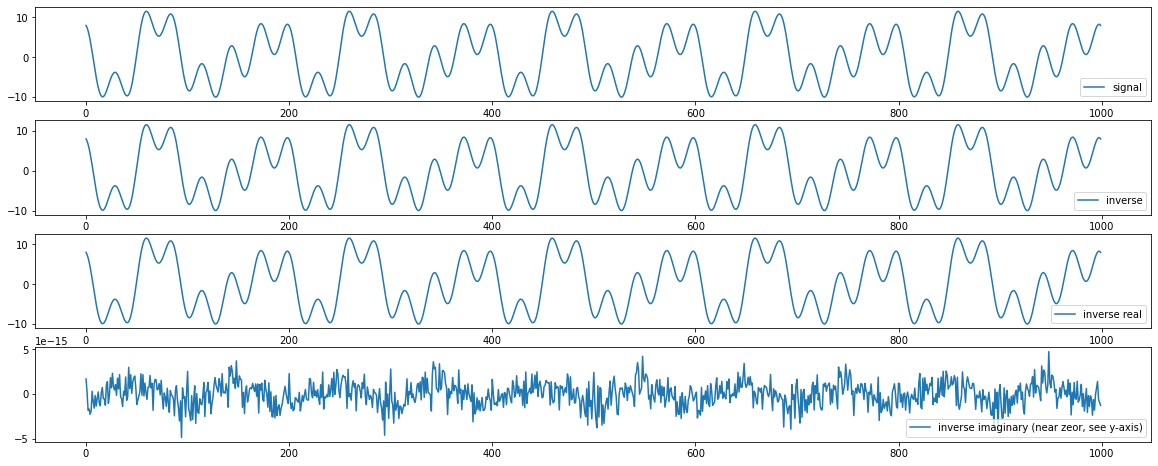

In [16]:
x_range = np.linspace(0,10*np.pi,1000)
signal = 1*np.sin(x_range)
signal += 3*np.cos(x_range*3)
signal += 5*np.cos(x_range*7)
signal += -7*np.sin(x_range*2)

plt.figure(figsize = (20, 8))

fft_result = np.fft.fft(signal)
inverse_fft_result = np.fft.ifft(fft_result)

plt.subplot(4,1,1)
plt.plot(signal, label = 'signal')
plt.legend()

plt.subplot(4,1,2)
plt.plot(inverse_fft_result, label = 'inverse')
plt.legend()

plt.subplot(4,1,3)
plt.plot(inverse_fft_result.real, label = 'inverse real')
plt.legend()

plt.subplot(4,1,4)
plt.plot(inverse_fft_result.imag, label = 'inverse imaginary (near zeor, see y-axis)')
plt.legend()


## What is FFT Result?

In [39]:
print(x_range.shape)
print(fft_result.shape)

print(fft_result[1])
print(fft_result[1].real)
print(fft_result[1].imag)
print(np.sqrt(fft_result[1].real**2 + fft_result[1].imag**2))
print(np.abs(fft_result[1]))



(1000,)
(1000,)
(8.015825457307516+0.5232118162819339j)
8.015825457307516
0.5232118162819339
8.032882942425857
8.032882942425857


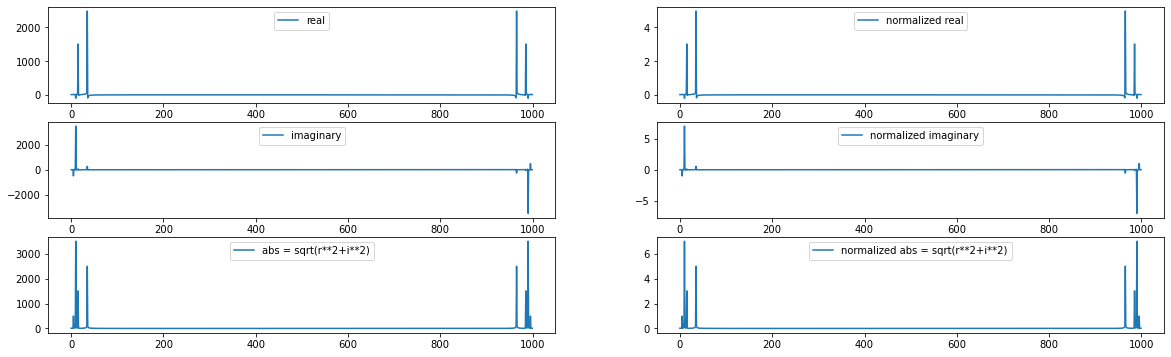

In [22]:
plt.figure(figsize = (20, 6))

plt.subplot(3,2,1)
plt.plot(fft_result.real, label = 'real')
plt.legend(loc = 'upper center')

plt.subplot(3,2,3)
plt.plot(fft_result.imag, label = 'imaginary')
plt.legend(loc = 'upper center')

plt.subplot(3,2,5)
plt.plot(np.abs(fft_result), label = 'abs = sqrt(r**2+i**2)')
plt.legend(loc = 'upper center')



normalize = len(fft_result)/2

plt.subplot(3,2,2)
plt.plot(fft_result.real/normalize, label = 'normalized real')
plt.legend(loc = 'upper center')

plt.subplot(3,2,4)
plt.plot(fft_result.imag/normalize, label = 'normalized imaginary')
plt.legend(loc = 'upper center')

plt.subplot(3,2,6)
plt.plot(np.abs(fft_result)/normalize, label = 'normalized abs = sqrt(r**2+i**2)')
plt.legend(loc = 'upper center')


## Reproduce well-explained blog

#### https://towardsdatascience.com/use-classes-for-generating-signals-6694d22e9a80
#### https://medium.com/towards-data-science/fourier-transform-the-practical-python-implementation-acdd32f1b96a

In [24]:
# https://towardsdatascience.com/use-classes-for-generating-signals-6694d22e9a80
# https://medium.com/towards-data-science/fourier-transform-the-practical-python-implementation-acdd32f1b96a
# Building a class Signal for better use.
class Signal:
  """
  Generate sinusoidal signals with specific ampltiudes, frequencies, duration,
  sampling rate, and phase.
  Example:
    signal = Signal(amplitude=10, sampling_rate=2000.0)
    sine = signal.sine()
    cosine = signal.cosine()
  """

  def __init__(self, amplitude=1, frequency=10, duration=1, sampling_rate=100.0, phase=0):
    """
    Initialize the Signal class.
    Args:
        amplitude (float): The amplitude of the signal
        frequency (int): The frequency of the signal Hz
        duration (float): The duration of the signal in second
        sampling_rate (float): The sampling per second of the signal
        phase (float): The phase of the signal in radians
    
    Additional parameters,which are required to generate the signal, are
    calculated and defined to be initialized here too:
        time_step (float): 1.0/sampling_rate
        time_axis (np.array): Generate the time axis from the duration and
                              the time_step of the signal. The time axis is
                              for better representation of the signal.
    """
    self.amplitude = amplitude
    self.frequency = frequency
    self.duration = duration
    self.sampling_rate = sampling_rate
    self.phase = phase
    self.time_step = 1.0/self.sampling_rate
    self.time_axis = np.arange(0, self.duration, self.time_step)
  
  # Generate sine wave
  def sine(self):
    """
    Method of Signal
    Returns:
        np.array of sine wave using the pre-defined variables (amplitude,
        frequency, time_axis, and phase)
    """
    return self.amplitude*np.sin(2*np.pi*self.frequency*self.time_axis+self.phase)
  
  # Generate cosine wave
  def cosine(self):
    """
    Method of Signal
    Returns:
        np.array of cosine wave using the pre-defined variables (amplitude,
        frequency, time_axis, and phase)
    """
    return self.amplitude*np.cos(2*np.pi*self.frequency*self.time_axis+self.phase)

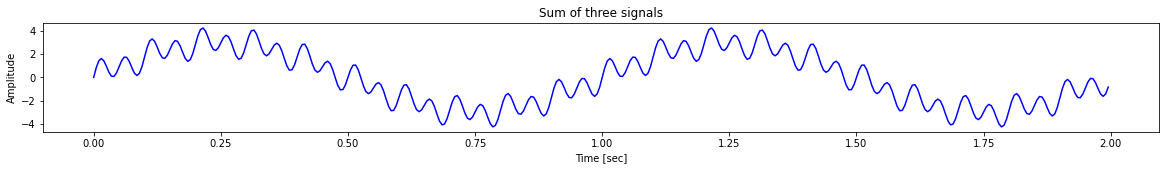

In [25]:
plt.figure(figsize = (20,2))

# Generate the three signals using Signal class and its method sine()
signal_1hz = Signal(amplitude=3, frequency=1, sampling_rate=200, duration=2)
sine_1hz = signal_1hz.sine()
signal_20hz = Signal(amplitude=1, frequency=20, sampling_rate=200, duration=2)
sine_20hz = signal_20hz.sine()
signal_10hz = Signal(amplitude=0.5, frequency=10, sampling_rate=200, duration=2)
sine_10hz = signal_10hz.sine()

# Sum the three signals to output the signal we want to analyze
signal = sine_1hz + sine_20hz + sine_10hz

# Plot the signal
plt.plot(signal_1hz.time_axis, signal, 'b')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.title('Sum of three signals')
plt.show()

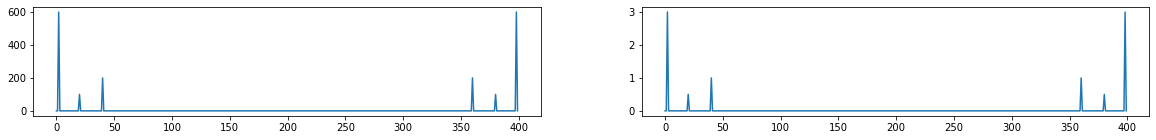

In [26]:
# Adjust with normalization -> the amplitude correspond to original signal's

fourier_result = np.fft.fft(signal)
plt.figure(figsize = (20,2))

plt.subplot(1,2,1)
plt.plot(np.abs(fourier_result))

plt.subplot(1,2,2)
plt.plot(np.abs(fourier_result) / (len(fourier_result)/2))



True

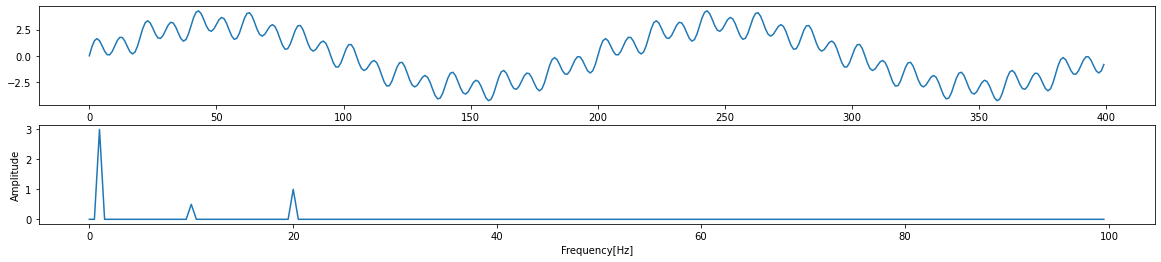

In [38]:
plt.figure(figsize = (20,4))

plt.subplot(2,1,1)
plt.plot(signal, label = 'original signal')

fourier_result = np.fft.fft(signal)
fft_range = np.fft.fftfreq(len(fourier_result), d = 1/200)
normalize = len(fourier_result) / 2

# Select only the positive frequencies
mask = fft_range >= 0
fourier_result = fourier_result[mask]
fft_range = fft_range[mask]

plt.subplot(2,1,2)
plt.plot(fft_range, np.abs(fourier_result) / normalize, label = 'fourier space')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')



'''
Recall that the original signal

signal_1hz = Signal(amplitude=3, frequency=1, sampling_rate=200, duration=2)
sine_1hz = signal_1hz.sine()
signal_20hz = Signal(amplitude=1, frequency=20, sampling_rate=200, duration=2)
sine_20hz = signal_20hz.sine()
signal_10hz = Signal(amplitude=0.5, frequency=10, sampling_rate=200, duration=2)
sine_10hz = signal_10hz.sine()



the tuple of (amplitude, frequency) are plotted well.


So this plot stand for what and how much the frequency are in original signal

'''
True

## eliminate (or remain) in fourier space and retrive (inverse fft) it

/Users/dl/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


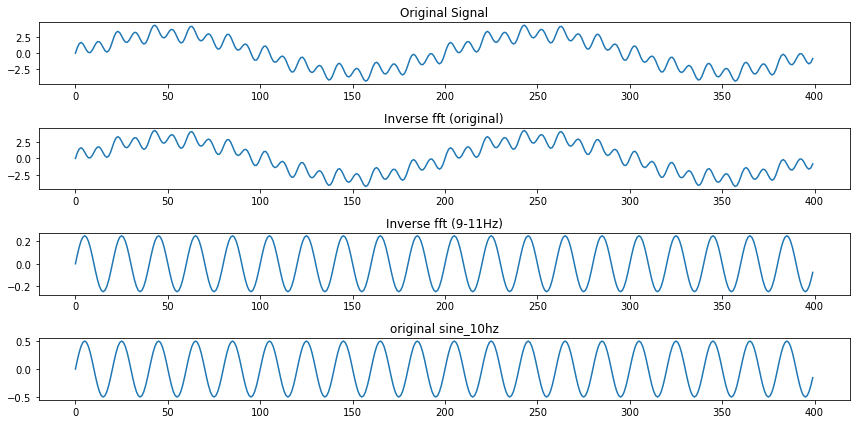

In [39]:

# Perform FFT
fourier_result = np.fft.fft(signal)
fft_range = np.fft.fftfreq(len(fourier_result), d = 1/200)


# Plot the result
plt.figure(figsize=(12, 6))

plt.subplot(4, 1, 1)
plt.plot(signal)
plt.title('Original Signal')

inverse_fft = np.fft.ifft(fourier_result)
plt.subplot(4, 1, 2)
plt.plot(inverse_fft)
plt.title('Inverse fft (original)')



mask = ~((fft_range >= 9) & (fft_range <= 11))
fourier_result[mask] = 0
# Perform inverse FFT
inverse_fft = np.fft.ifft(fourier_result)

plt.subplot(4, 1, 3)
plt.plot(inverse_fft.real)  # Get the real part of the signal
plt.title('Inverse fft (9-11Hz)')


plt.subplot(4, 1, 4)
plt.plot(sine_10hz)  # Get the real part of the signal
plt.title('original sine_10hz')

plt.tight_layout()
plt.show()


## denoising

Well, I think there are two methods to denoising using fft

The choice between frequency-domain filtering and amplitude thresholding really depends on the characteristics of your specific signal and noise, as well as what assumptions you can make.

#### Frequency-Domain Filtering:   
This is generally a good choice if you have strong prior knowledge about which frequencies are of interest in your signal. For example, if you know your signal of interest is mostly contained within a certain frequency band (e.g., 1-30 Hz), then you could filter out all components outside of this band. This is often used in EEG analysis, for example, where certain frequency bands (alpha, beta, etc.) are known to be of interest.

#### Amplitude Thresholding:   
This can be a good choice if you know that the signal components generally have higher amplitude in the frequency domain than the noise components. For example, if the noise is primarily low-amplitude, high-frequency content (like white noise), then amplitude thresholding can be an effective way to remove it.

In many real-world situations, a combination of both techniques might be used. For example, you might first perform a frequency-domain filter to isolate the frequencies of interest, and then apply amplitude thresholding to further remove any noise within that frequency band.

Finally, it's important to remember that both of these are relatively simple methods and might not work well if the noise characteristics overlap too much with the signal characteristics. More advanced techniques, like wavelet denoising or machine learning-based approaches, might be necessary in these cases.

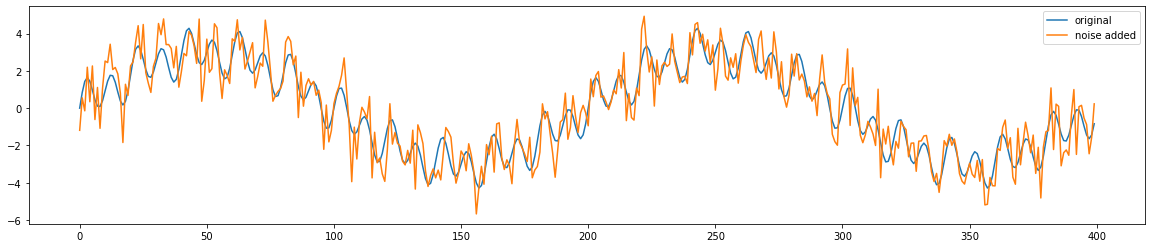

In [40]:
signal_1hz = Signal(amplitude=3, frequency=1, sampling_rate=200, duration=2)
sine_1hz = signal_1hz.sine()
signal_20hz = Signal(amplitude=1, frequency=20, sampling_rate=200, duration=2)
sine_20hz = signal_20hz.sine()
signal_10hz = Signal(amplitude=0.5, frequency=10, sampling_rate=200, duration=2)
sine_10hz = signal_10hz.sine()

# Sum the three signals to output the signal we want to analyze
signal = sine_1hz + sine_20hz + sine_10hz 
signal_noise = signal + + np.random.normal(loc = .0, scale = 1., size = 400)

plt.figure(figsize = (20, 4))
plt.plot(signal, label = 'original')
plt.plot(signal_noise, label = 'noise added')
plt.legend()

Text(0, 0.5, 'Amplitude')

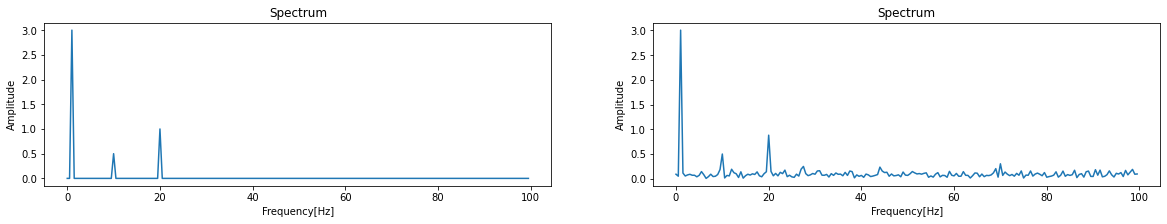

In [69]:
plt.figure(figsize = (20, 3))

fourier_result = np.fft.fft(signal)
fft_range = np.fft.fftfreq(len(fourier_result), d = 1/200)
normalize = len(fourier_result) / 2

# Select only the positive frequencies
mask = fft_range >= 0
fourier_result = fourier_result[mask]
fft_range = fft_range[mask]

plt.subplot(1,2,1)
plt.plot(fft_range, np.abs(fourier_result) / normalize)
plt.title('Spectrum')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')


fourier_result = np.fft.fft(signal_noise)
fft_range = np.fft.fftfreq(len(fourier_result), d = 1/200)
normalize = len(fourier_result) / 2

# Select only the positive frequencies
mask = fft_range >= 0
fourier_result = fourier_result[mask]
fft_range = fft_range[mask]

plt.subplot(1,2,2)
plt.plot(fft_range, np.abs(fourier_result) / normalize)
plt.title('Spectrum')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')




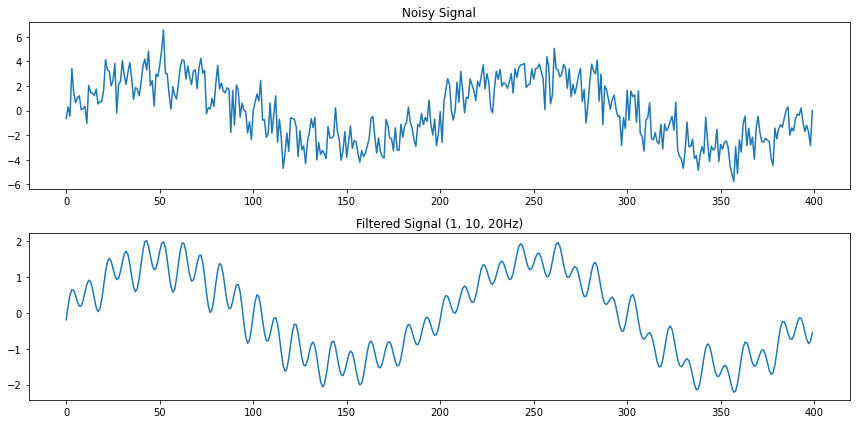

In [72]:
# Perform FFT
fourier_result_noise = np.fft.fft(signal_noise)
fft_range = np.fft.fftfreq(len(fourier_result_noise), d=1/200)

# Copy the Fourier Transform results and keep only the frequencies of interest (1, 10 and 20 Hz in this case)
filtered_fourier = fourier_result_noise.copy()

# since fft_range has negatve part so abs needed
mask = ~((np.abs(fft_range - 1) <= 1) | (np.abs(fft_range - 10) <= 1) | (np.abs(fft_range - 20) <= 1))
filtered_fourier[mask] = 0

# Perform inverse FFT
filtered_signal = np.fft.ifft(filtered_fourier)

# Plot the result
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(signal_noise)
plt.title('Noisy Signal')

plt.subplot(2, 1, 2)
plt.plot(filtered_signal.real)  # Get the real part of the signal
plt.title('Filtered Signal (1, 10, 20Hz)')

plt.tight_layout()
plt.show()


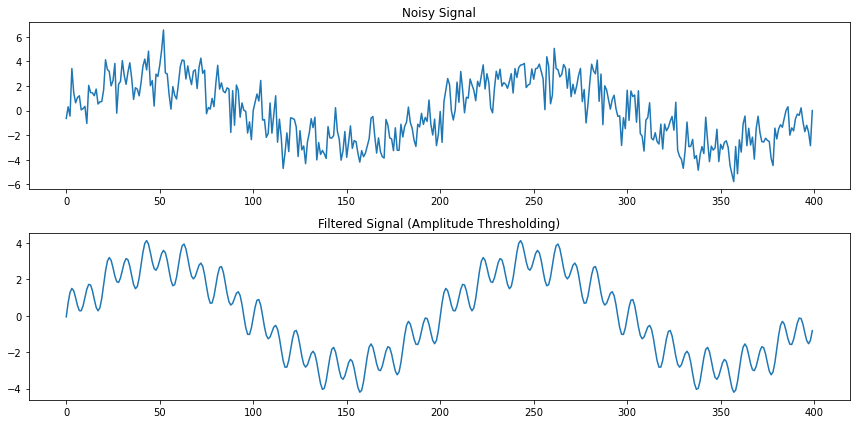

In [71]:
# Perform FFT
fourier_result_noise = np.fft.fft(signal_noise)
fft_range = np.fft.fftfreq(len(fourier_result_noise), d=1/200)

# Set amplitude threshold. You would need to decide the value based on your specific case.
amplitude_threshold = 0.4 * normalize

# Create a mask for components with amplitude greater than the threshold
mask = np.abs(fourier_result_noise) > amplitude_threshold

# Set the components with amplitude less than the threshold to zero
filtered_fourier = fourier_result_noise.copy()
filtered_fourier[~mask] = 0

# Perform inverse FFT
filtered_signal = np.fft.ifft(filtered_fourier)

# Plot the result
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(signal_noise)
plt.title('Noisy Signal')

plt.subplot(2, 1, 2)
plt.plot(filtered_signal.real)  # Get the real part of the signal
plt.title('Filtered Signal (Amplitude Thresholding)')

plt.tight_layout()
plt.show()
